In [251]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

In [2]:
fb_clr = {
    "greens": {
        367: (0,100,0),
        396: (50,205,50),
        370: "",
        363: "",
        "na": "",
    },
    "yellows": {
        307: "",
        387: "",
        309: "",
        383: "",
    },
    "blues": {
        351: "",
        345: "",
        337: "",
        347: "",
    },
    "reds": {
        314: "",
        316: "",
        327: "",
        321: "",
    },
}

In [3]:
colors = list(fb_clr.keys())
g = list(fb_clr['greens'].keys())

perm_g = permutations(g)
for idx, pair in enumerate(perm_g, start=1):
    print(f"{idx}. {pair}")

1. (367, 396, 370, 363, 'na')
2. (367, 396, 370, 'na', 363)
3. (367, 396, 363, 370, 'na')
4. (367, 396, 363, 'na', 370)
5. (367, 396, 'na', 370, 363)
6. (367, 396, 'na', 363, 370)
7. (367, 370, 396, 363, 'na')
8. (367, 370, 396, 'na', 363)
9. (367, 370, 363, 396, 'na')
10. (367, 370, 363, 'na', 396)
11. (367, 370, 'na', 396, 363)
12. (367, 370, 'na', 363, 396)
13. (367, 363, 396, 370, 'na')
14. (367, 363, 396, 'na', 370)
15. (367, 363, 370, 396, 'na')
16. (367, 363, 370, 'na', 396)
17. (367, 363, 'na', 396, 370)
18. (367, 363, 'na', 370, 396)
19. (367, 'na', 396, 370, 363)
20. (367, 'na', 396, 363, 370)
21. (367, 'na', 370, 396, 363)
22. (367, 'na', 370, 363, 396)
23. (367, 'na', 363, 396, 370)
24. (367, 'na', 363, 370, 396)
25. (396, 367, 370, 363, 'na')
26. (396, 367, 370, 'na', 363)
27. (396, 367, 363, 370, 'na')
28. (396, 367, 363, 'na', 370)
29. (396, 367, 'na', 370, 363)
30. (396, 367, 'na', 363, 370)
31. (396, 370, 367, 363, 'na')
32. (396, 370, 367, 'na', 363)
33. (396, 370, 36

In [4]:
def filtered_coords_to_segments(filtered, x_delta):
    segments, cur_segment = [], [filtered[0]]

    for idx, coord in enumerate(filtered):
        if idx == 0:
            continue
        if coord[0] - cur_segment[-1][0] <= x_delta:
            cur_segment.append(coord)
        else:
            segments.append(cur_segment)
            cur_segment = [coord]
    
    segments.append(cur_segment)

    return [np.array(seg) for seg in segments]


Shift factor: 0


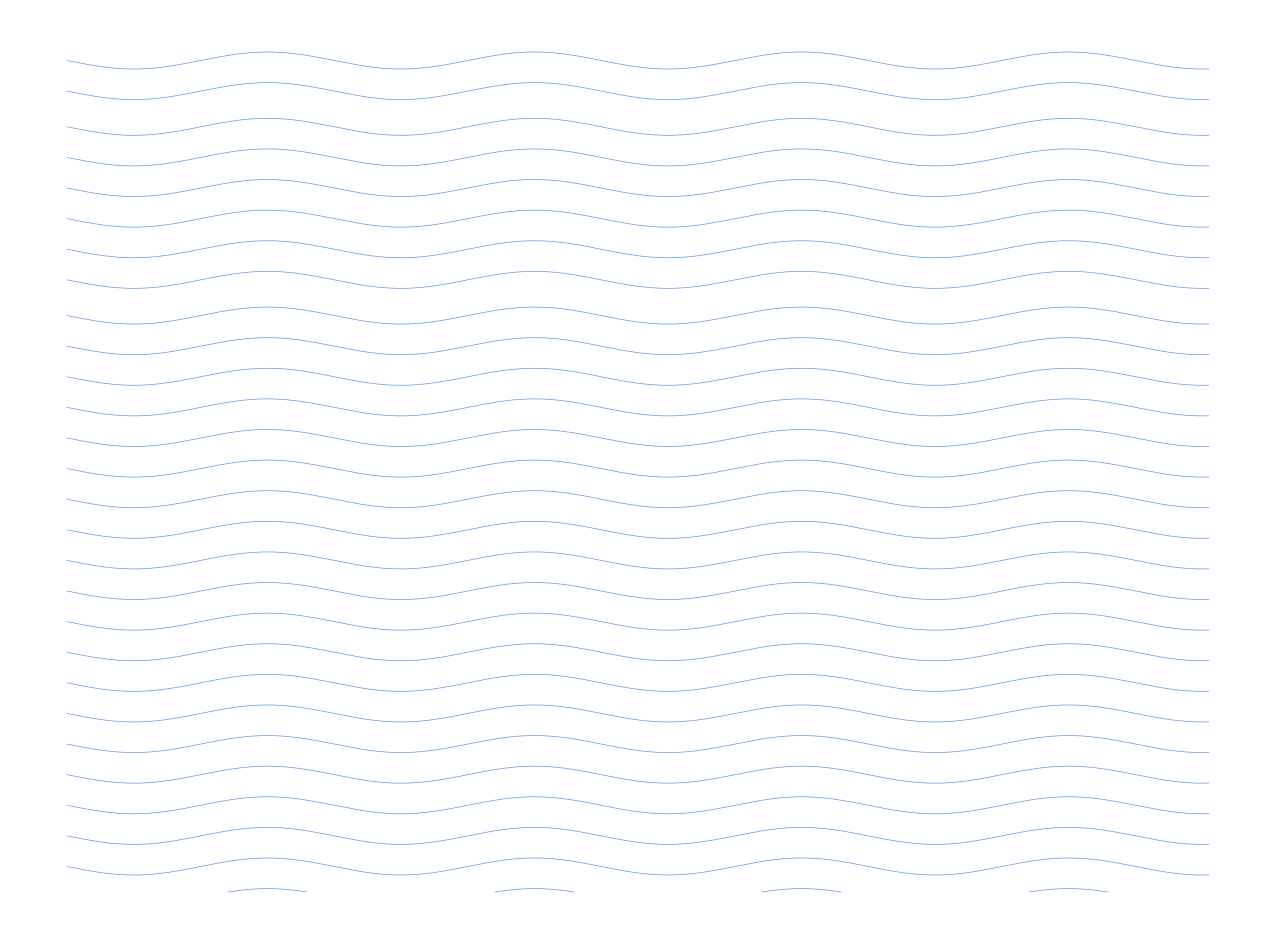

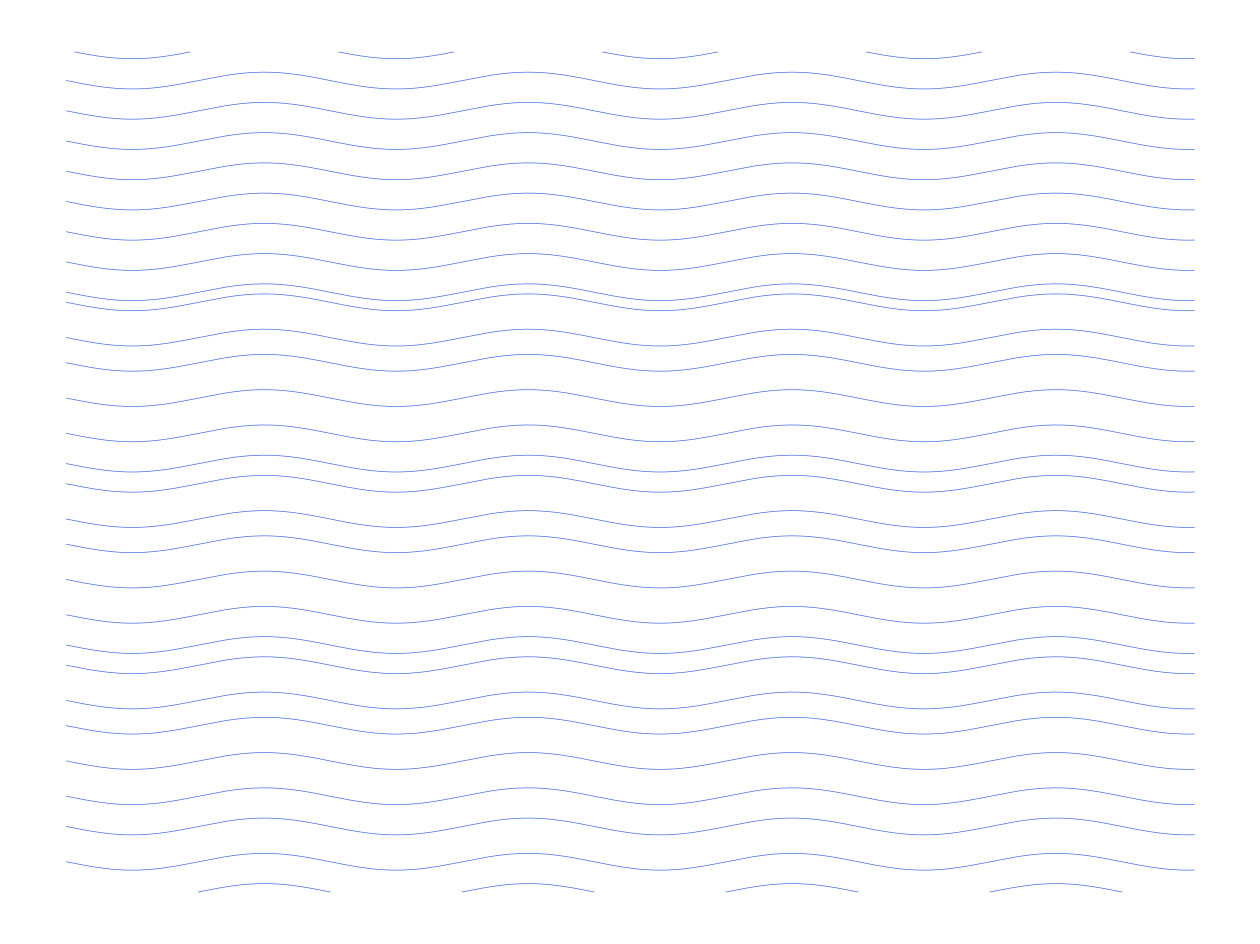

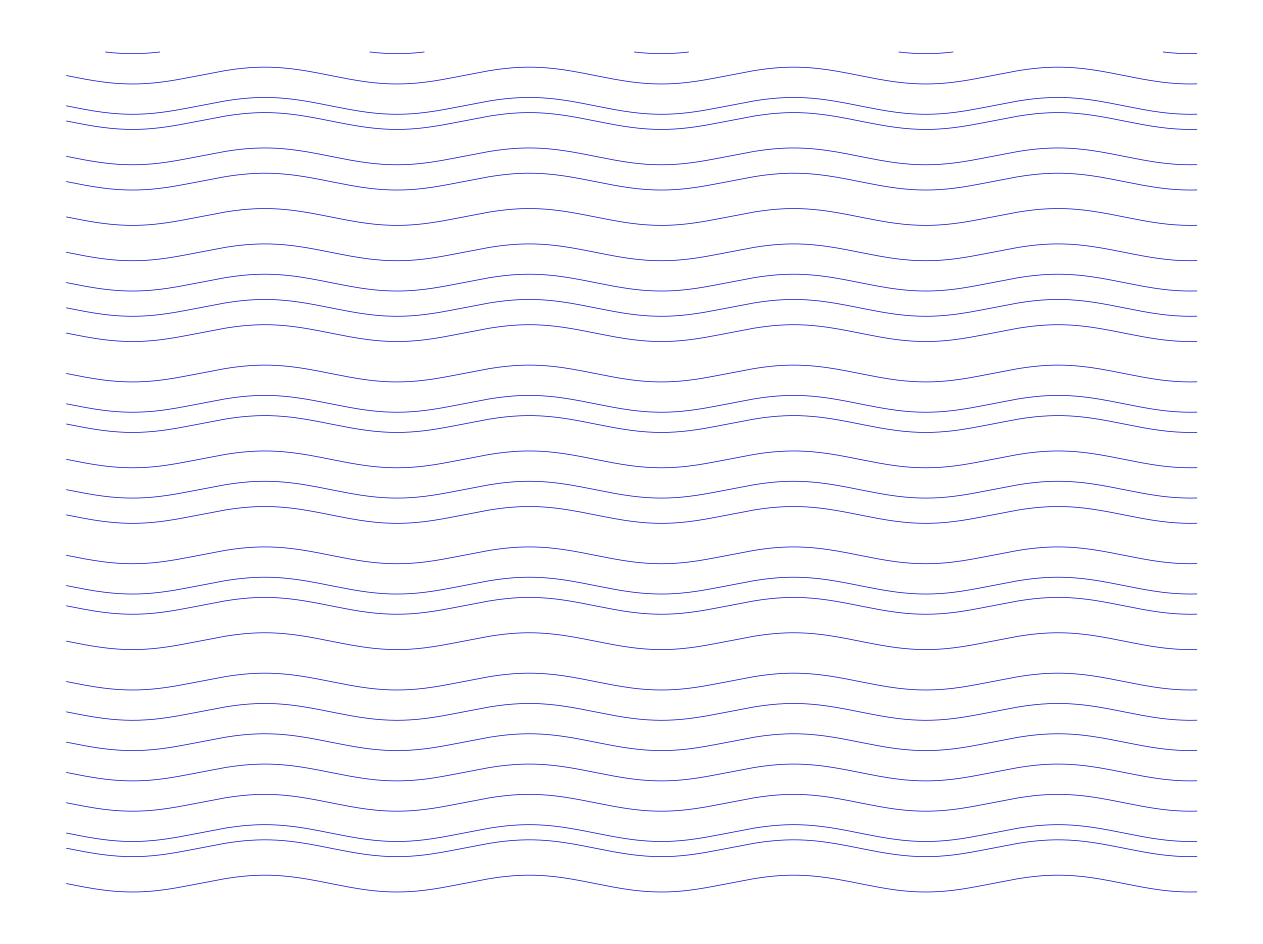

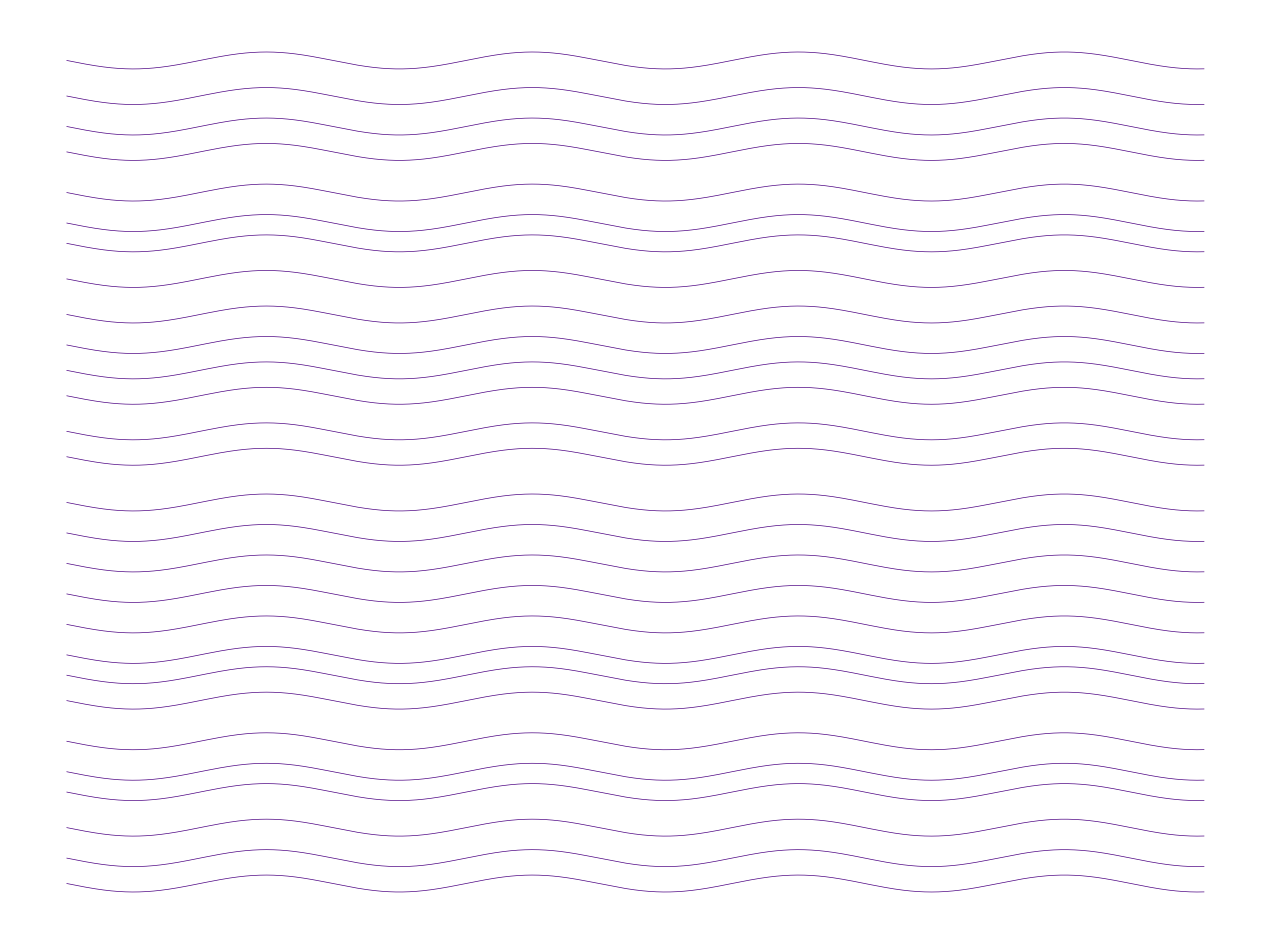

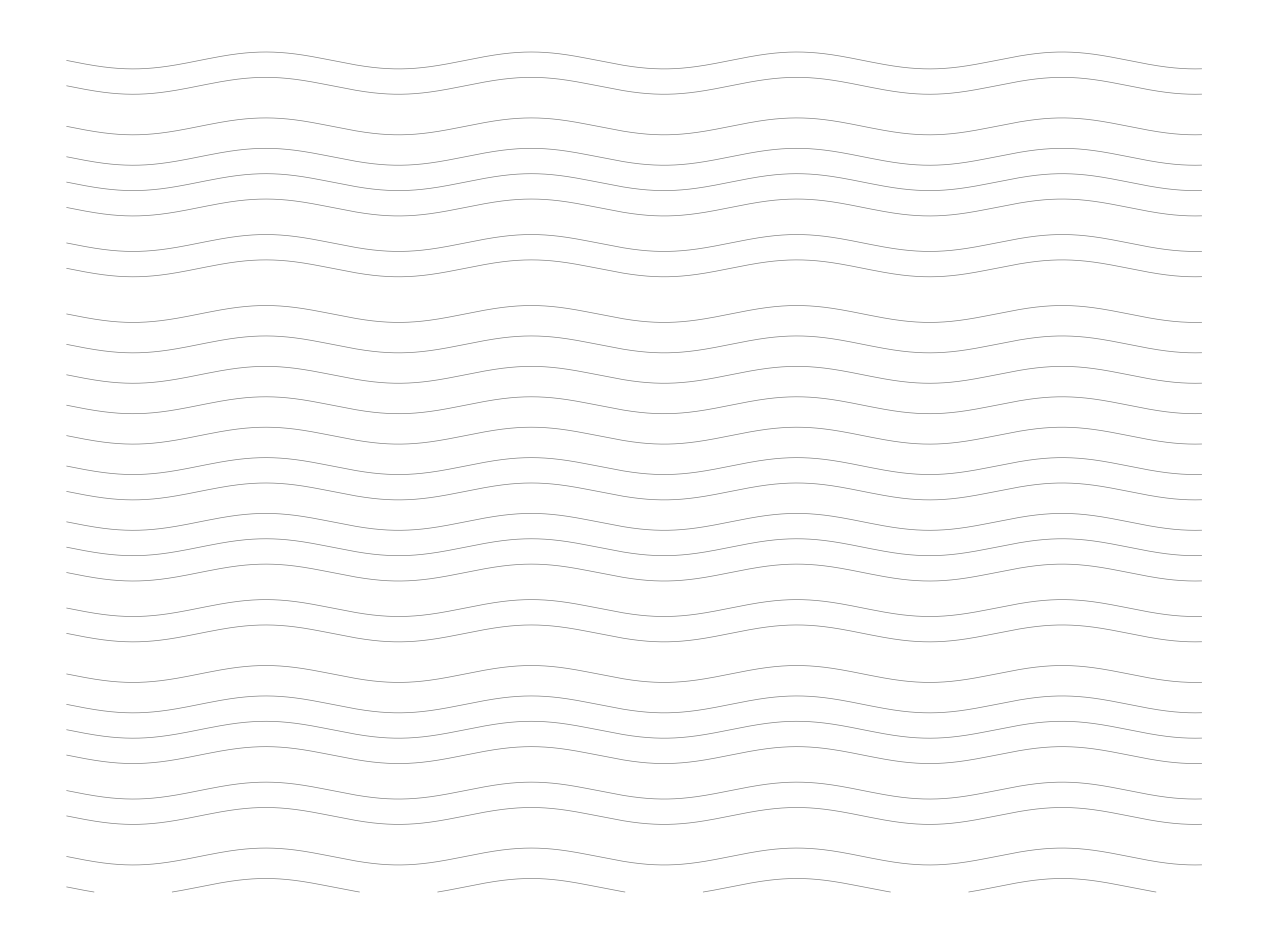

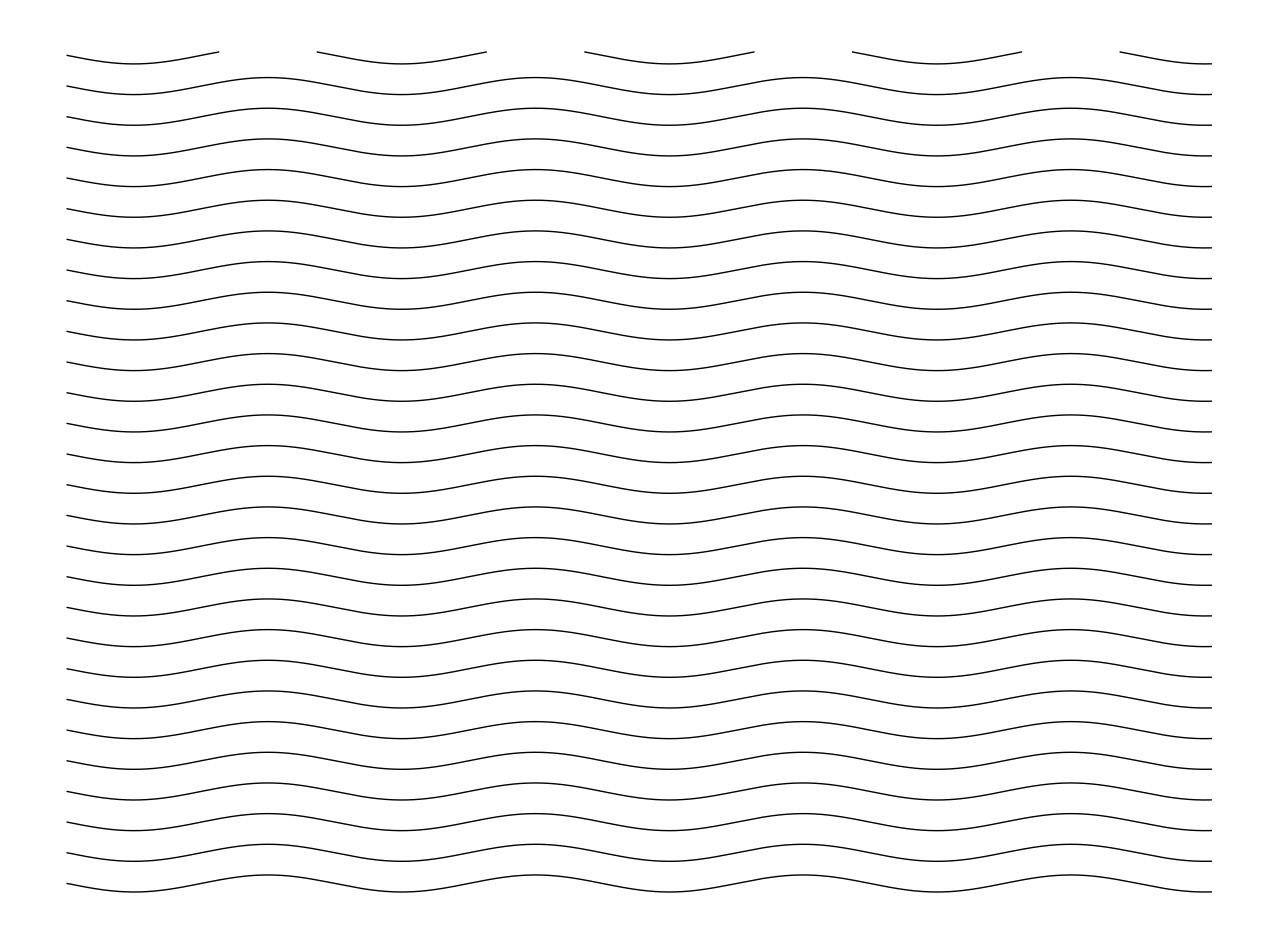

In [223]:
color_data = {'cornflowerblue': 347, 'royalblue': 345, 'mediumblue': 351, 'indigo': 337, 'grey': 396}
colors = list(color_data.keys())
color_combinations = list(permutations(colors))

x_start = np.pi
x_stop = 12*np.pi
points = 20000
x = np.linspace(x_start, x_stop, points)

x_delta = np.round(x[1]-x[0], 4) + .0001

num_colors = len(colors) + 1 # all colors and one rhythmic color - by pen blue/black

shift_factor = np.random.rand()*2
shift_factor = 0
print(f'Shift factor: {shift_factor}')
shift_direction_every = np.random.randint(2,22)
shift_direction_every = 25
direction = 1
direction_on = 0

sine_squeeze_factor = .2
line_gap_y_factor = .12

for color_idx, color in enumerate(color_data):
    for comb_idx, combination in enumerate(color_combinations):
        proper_color_idx = combination.index(color)
        shift = (proper_color_idx + (len(combination)+1)*comb_idx)
        
        shift_modulo = (comb_idx % shift_direction_every) +1
    
        if  shift_modulo == 1 and direction_on:
            direction = direction * (-1)

        if direction == -1:
            microshift = shift_direction_every - shift_modulo
        else:
            microshift = shift_modulo
        
        if not direction_on:
            microshift = -shift
        # print(f'Shift modulo: {shift_modulo}. Direction: {direction}. Microshift: {microshift}')
        y = np.sin(x+microshift*shift_factor)*sine_squeeze_factor + shift*line_gap_y_factor

        coords = np.column_stack((x, y))
        x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
        y_mask = (coords[:, 1] >= 3) & (coords[:, 1] <= 23)
        filtered = coords[x_mask & y_mask]
        
        if len(filtered) > 0:
            segments = filtered_coords_to_segments(filtered, x_delta)
            for _ in range(1):
                for seg in segments:
                    plt.plot(seg[:, 0], seg[:, 1], color=color, linewidth=.5)

    plt.axis('off')
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(8.25*2, 6*2)
    plt.savefig(f'{color_data[color]}-{color}.svg')
    plt.show()

direction = 1

for comb_idx, combination in enumerate(color_combinations):
    shift = (5+(len(combination)+1)*comb_idx)
    shift_modulo = (comb_idx % shift_direction_every) +1
    
    if  shift_modulo == 1:
        direction = direction * (-1)
    
    if direction == -1 and direction_on:
        microshift = shift_direction_every - shift_modulo
    else:
        microshift = shift_modulo
    # print(f'Shift modulo: {shift_modulo}. Direction: {direction}. Microshift: {microshift}')

    if not direction_on:
            microshift = -shift

    y = np.sin(x+microshift*shift_factor)*sine_squeeze_factor + shift*line_gap_y_factor

    coords = np.column_stack((x, y))
    x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
    y_mask = (coords[:, 1] >= 3) & (coords[:, 1] <= 23)
    filtered = coords[x_mask & y_mask]
    
    if len(filtered) > 0:
        segments = filtered_coords_to_segments(filtered, x_delta)
        for _ in range(1):
            for seg in segments:
                plt.plot(seg[:, 0], seg[:, 1], 'k-', linewidth=1)

plt.axis('off')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(8.25*2, 6*2)
plt.savefig(f'1-pen.svg')
plt.show()

X-delta new: 0.0036


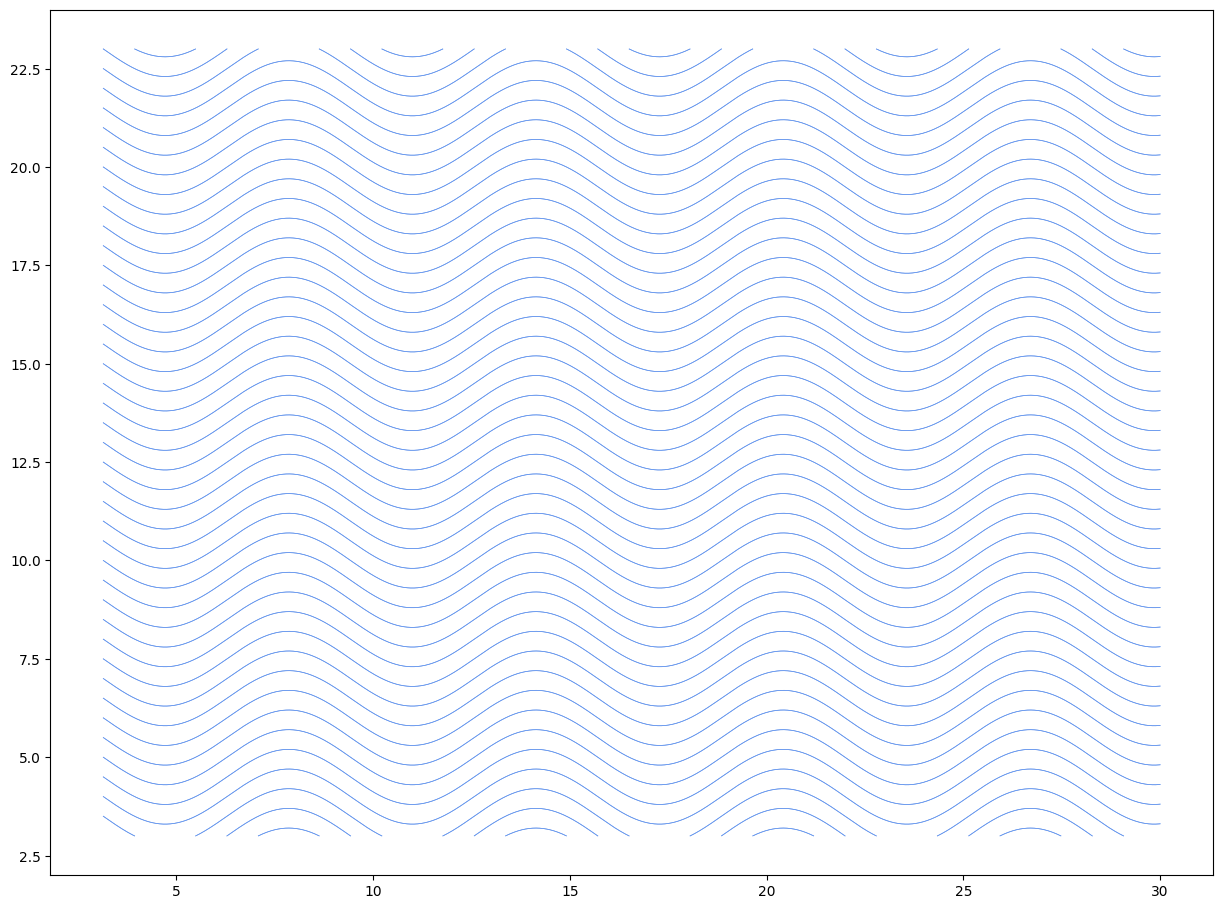

In [6]:
num_repeat = 40
num_sines = 100
max_repeat_line = 3

x_start = np.pi
x_stop = 12*np.pi
points = 10000
x = np.linspace(x_start, x_stop, points)

x_delta = np.round(x[1]-x[0], 4) + .0001

print(f'X-delta new: {x_delta}')

for sine_wave_shift in range(num_sines):
    # repeat_line = int(np.round((1 - np.abs((num_sines/2 - sine_wave_shift)) / (num_sines/2))* max_repeat_line, 0)+1)
    repeat_line=2
    y = np.sin(x)*.7 + sine_wave_shift*0.5
    coords = np.column_stack((x, y))
    x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
    y_mask = (coords[:, 1] >= 3) & (coords[:, 1] <= 23)
    filtered = coords[x_mask & y_mask]
    
    if len(filtered) > 0:
        segments = filtered_coords_to_segments(filtered, x_delta)
        # print(f'Sine wave {sine_wave_shift}. Repeat lines: {repeat_line}')
        for _ in range(repeat_line):
            for seg in segments:
                plt.plot(seg[:, 0], seg[:, 1], 'cornflowerblue', linewidth=.5)
    
    if num_repeat > 2:
        num_repeat -=1

plt.axis('on')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.savefig('fade_sine.svg')
plt.show()

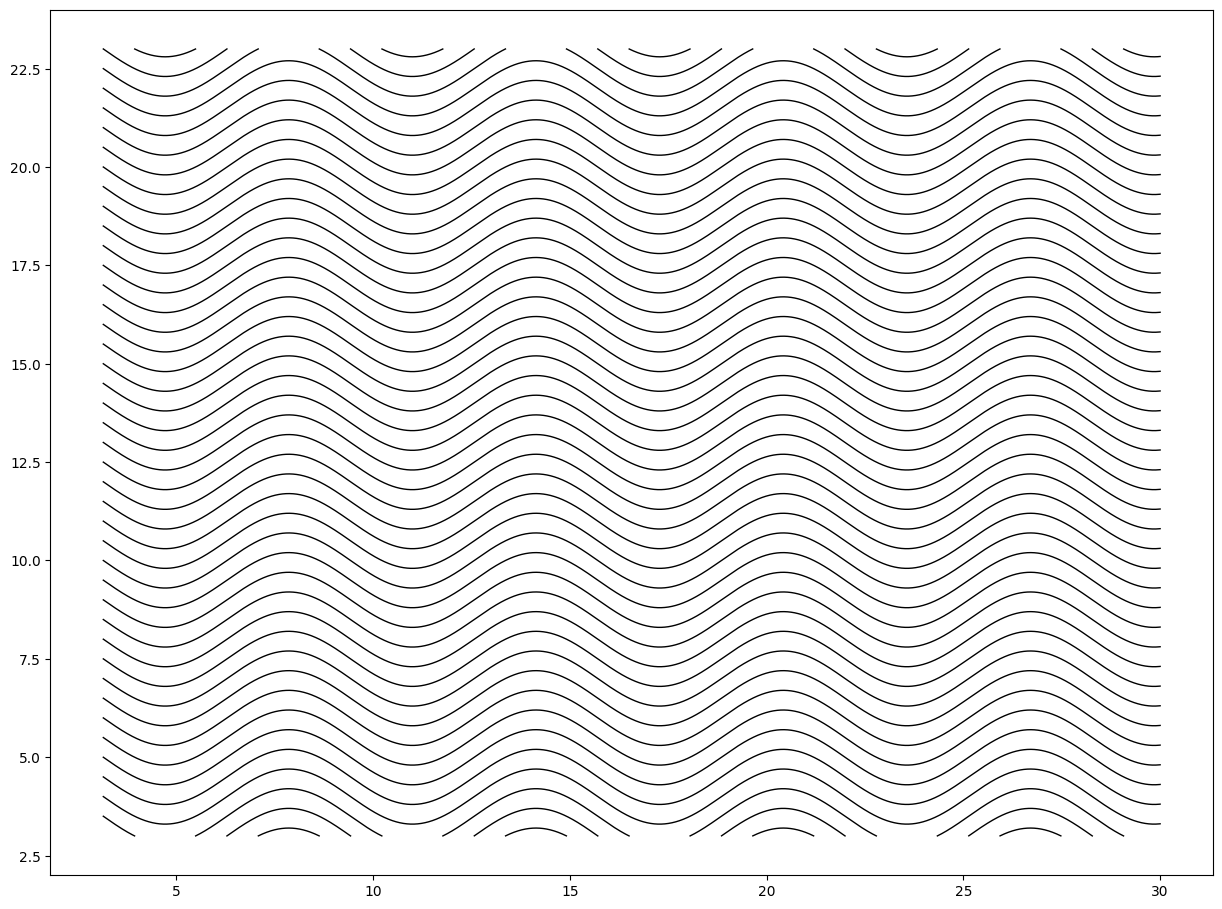

In [9]:
num_repeat = 40
x_start = np.pi
x_stop = 12*np.pi
points = 10000

for sine_wave_shift in range(num_sines):
    x = np.linspace(x_start, x_stop, points)
    y = np.sin(x)*.7 + sine_wave_shift*0.5
    coords = np.column_stack((x, y))
    x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
    y_mask = (coords[:, 1] >= 3) & (coords[:, 1] <= 23)
    filtered = coords[x_mask & y_mask]
    
    if len(filtered) > 0:
        segments = filtered_coords_to_segments(filtered, x_delta)
        # print(f'Sine wave {sine_wave_shift}. Repeat lines: {repeat_line}')
        for _ in range(1):
            for seg in segments:
                plt.plot(seg[:, 0], seg[:, 1], 'k-', linewidth=1)

plt.axis('on')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.savefig('fade_sine.svg')
plt.show()

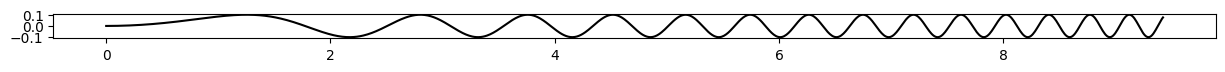

In [217]:
x = np.linspace(0, 3*np.pi, 1000)
y = np.sin(x**2)*.1

plt.plot(x, y, 'k-')

plt.axis('on')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.show()

In [50]:
max_number = 3
sequence = []

for idx in range(1, 11):
    value = (idx - 1) % (max_number * 2 - 2)
    if value >= max_number:
        value = max_number * 2 - value - 2
    else:
        value += 1
    sequence.append(value)

print(sequence)


[1, 2, 3, 1, 1, 2, 3, 1, 1, 2]


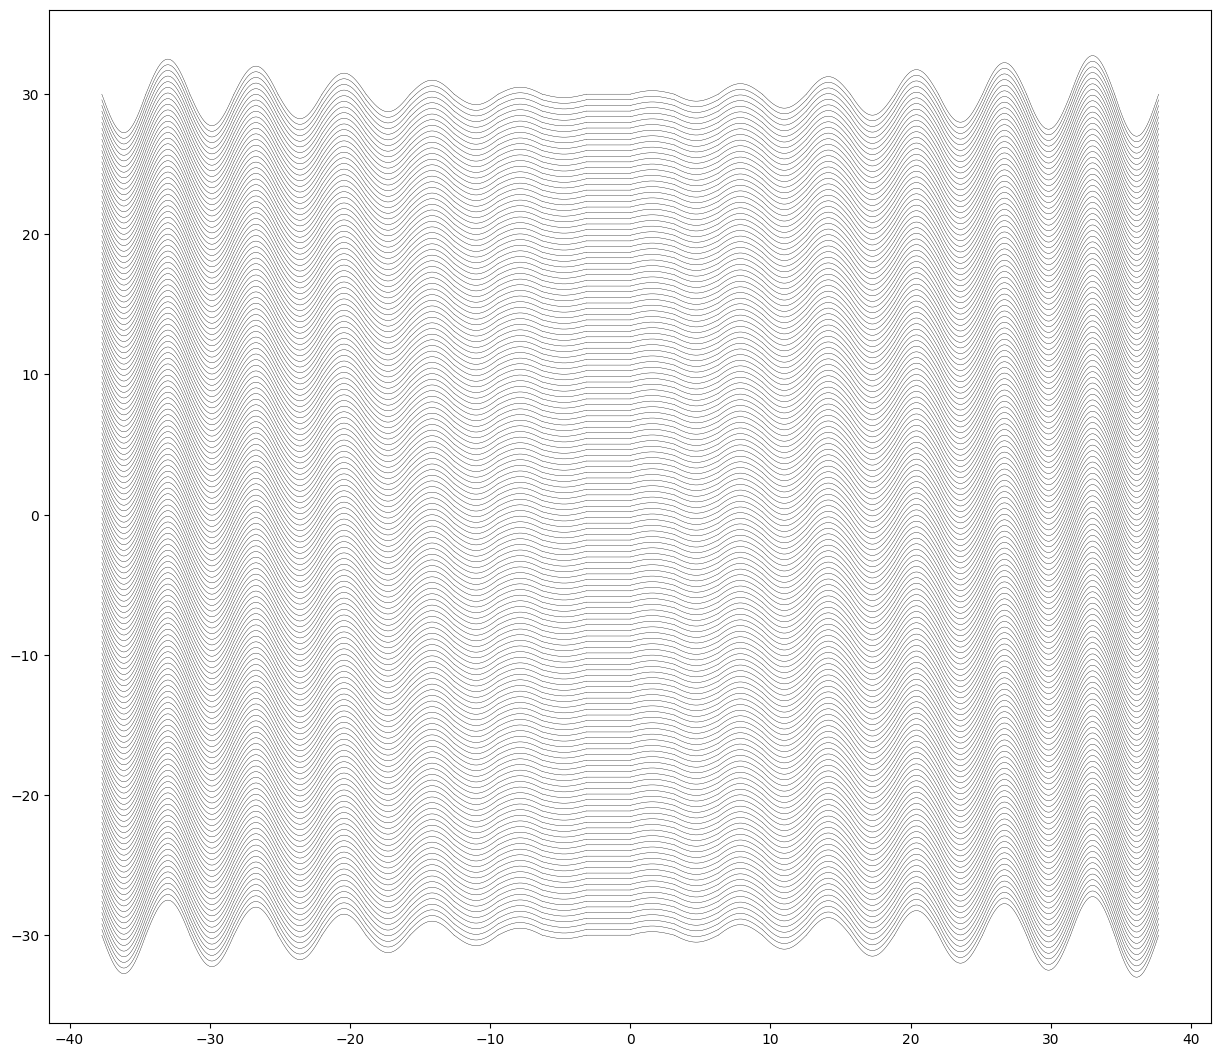

In [186]:
y_deltas = np.linspace(-30, 30, 150)
for y_delta in y_deltas:
    for phase in range(-12,12, 1):
        # if phase == -1: 
        #     continue
        x = np.linspace(phase*np.pi, (phase+1)*np.pi, 10000)
        plt.plot(x[:-1], np.sin(x[:-1])*(phase+1)*0.25+y_delta, 'k', linewidth=0.25)

# plt.gca().set_aspect('equal')
plt.axis('on')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.show()

Shift factor: 0.3


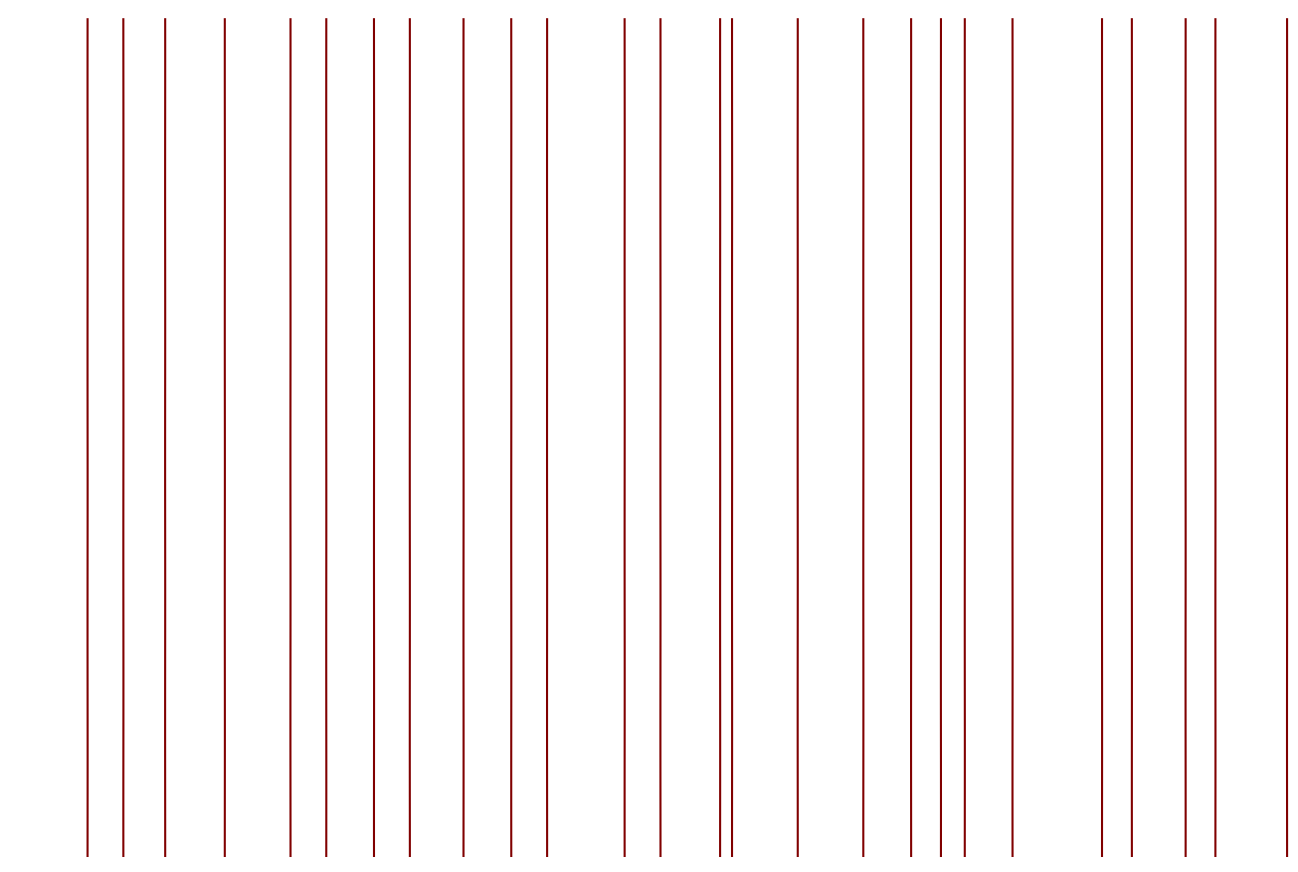

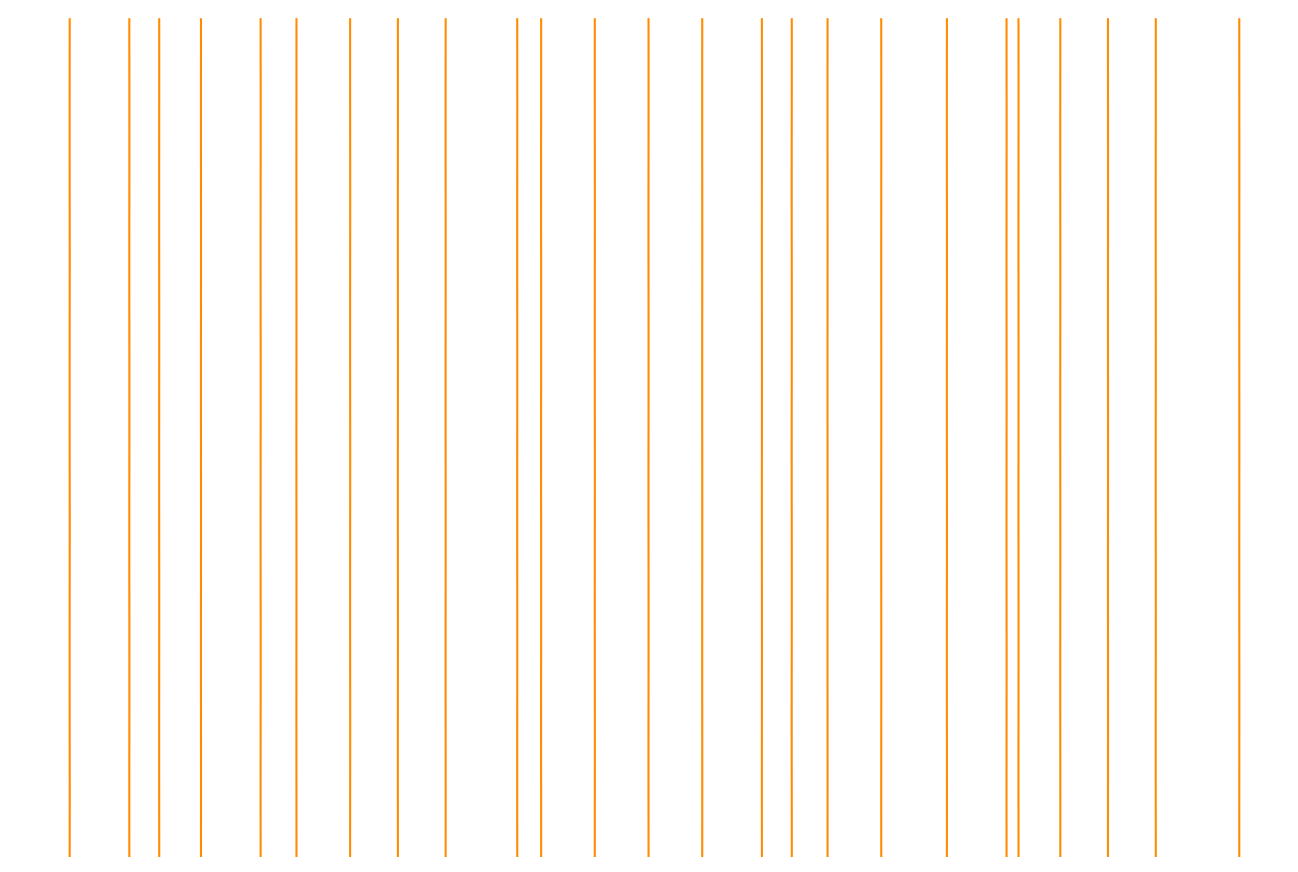

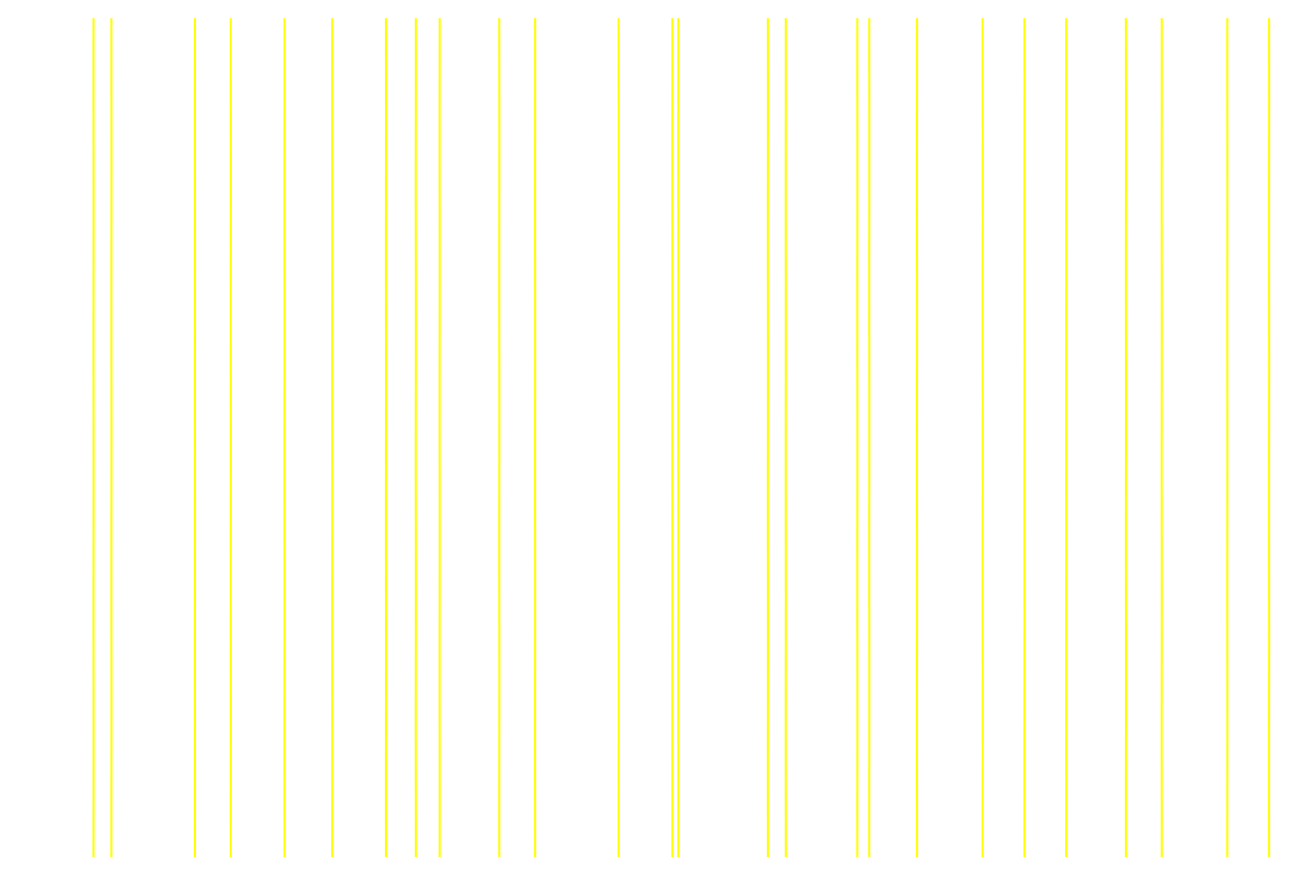

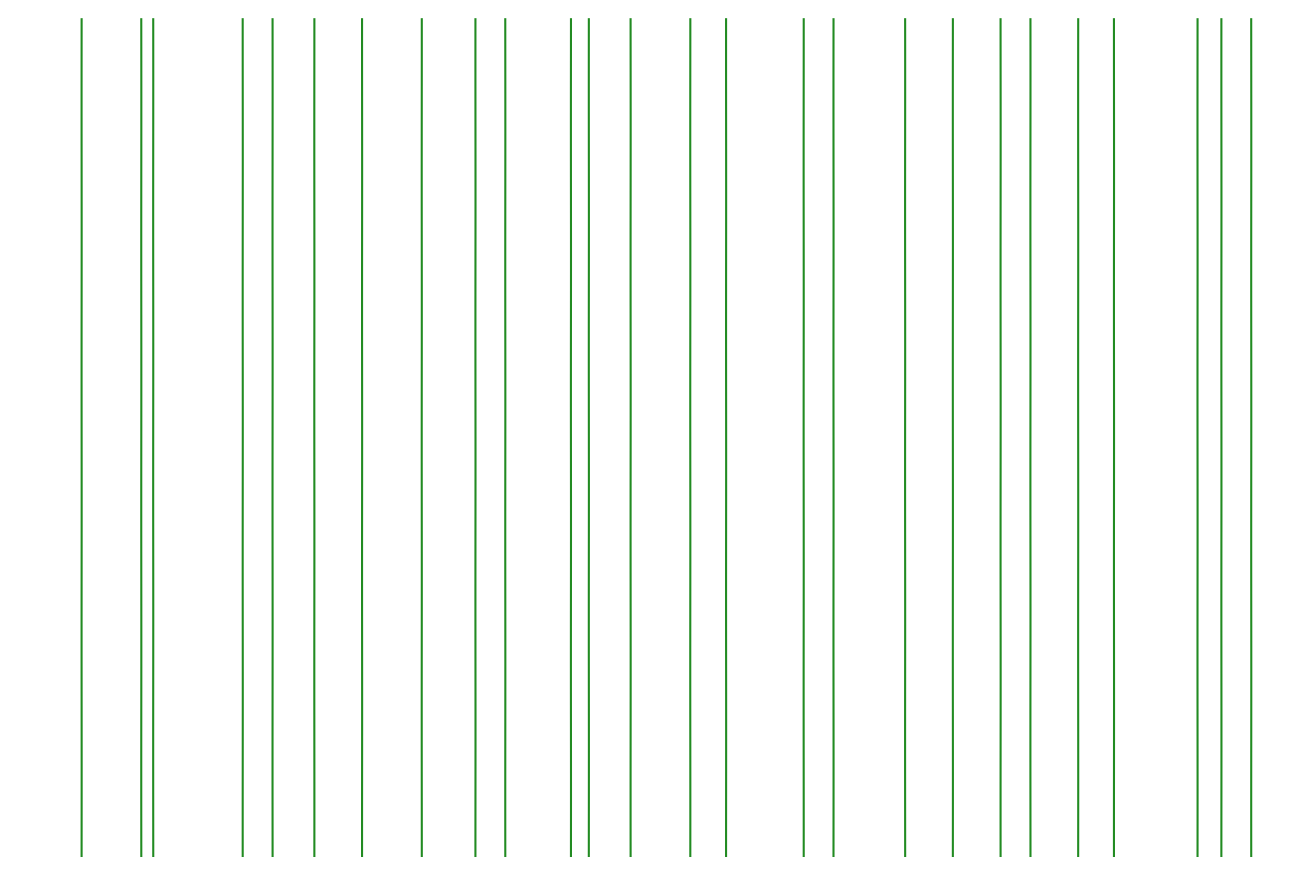

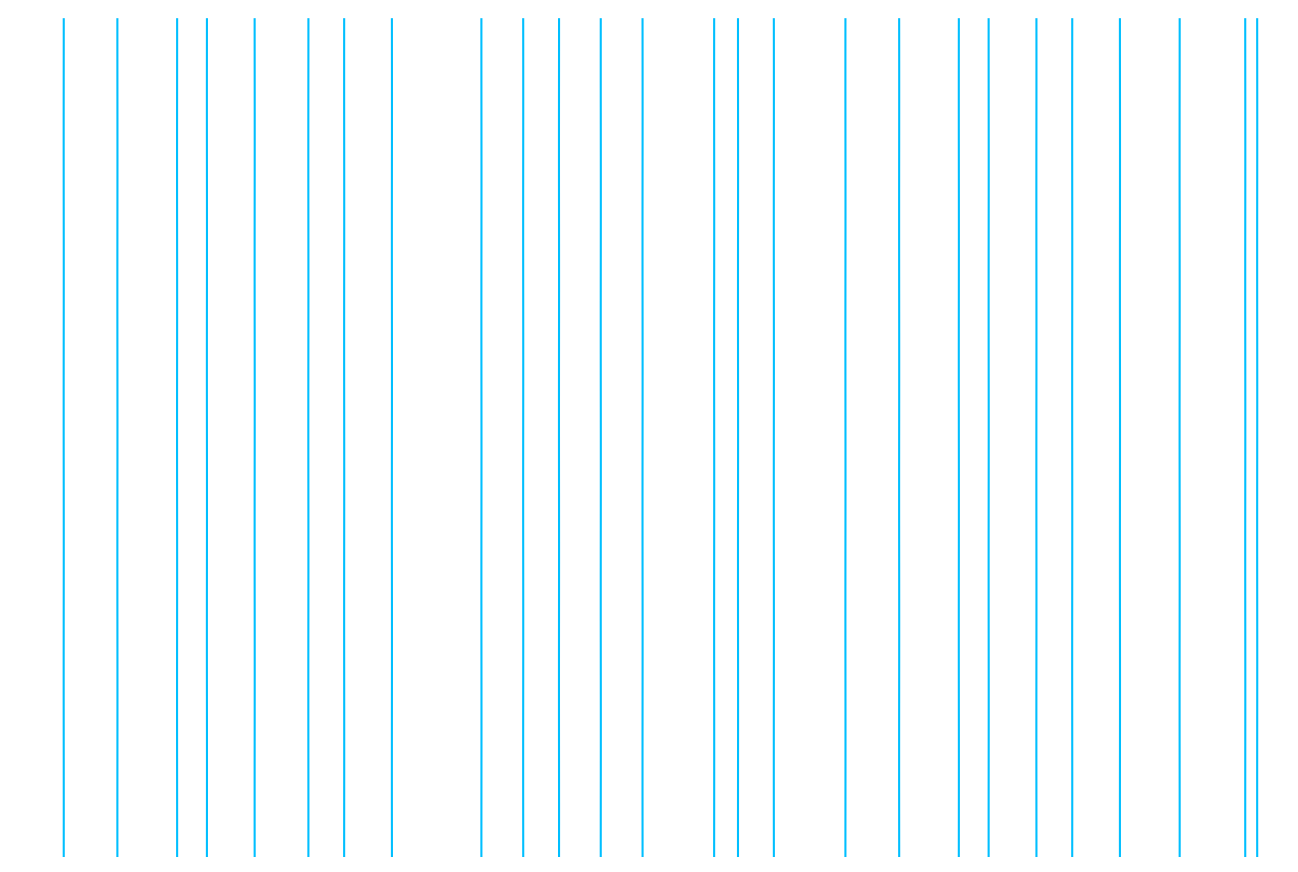

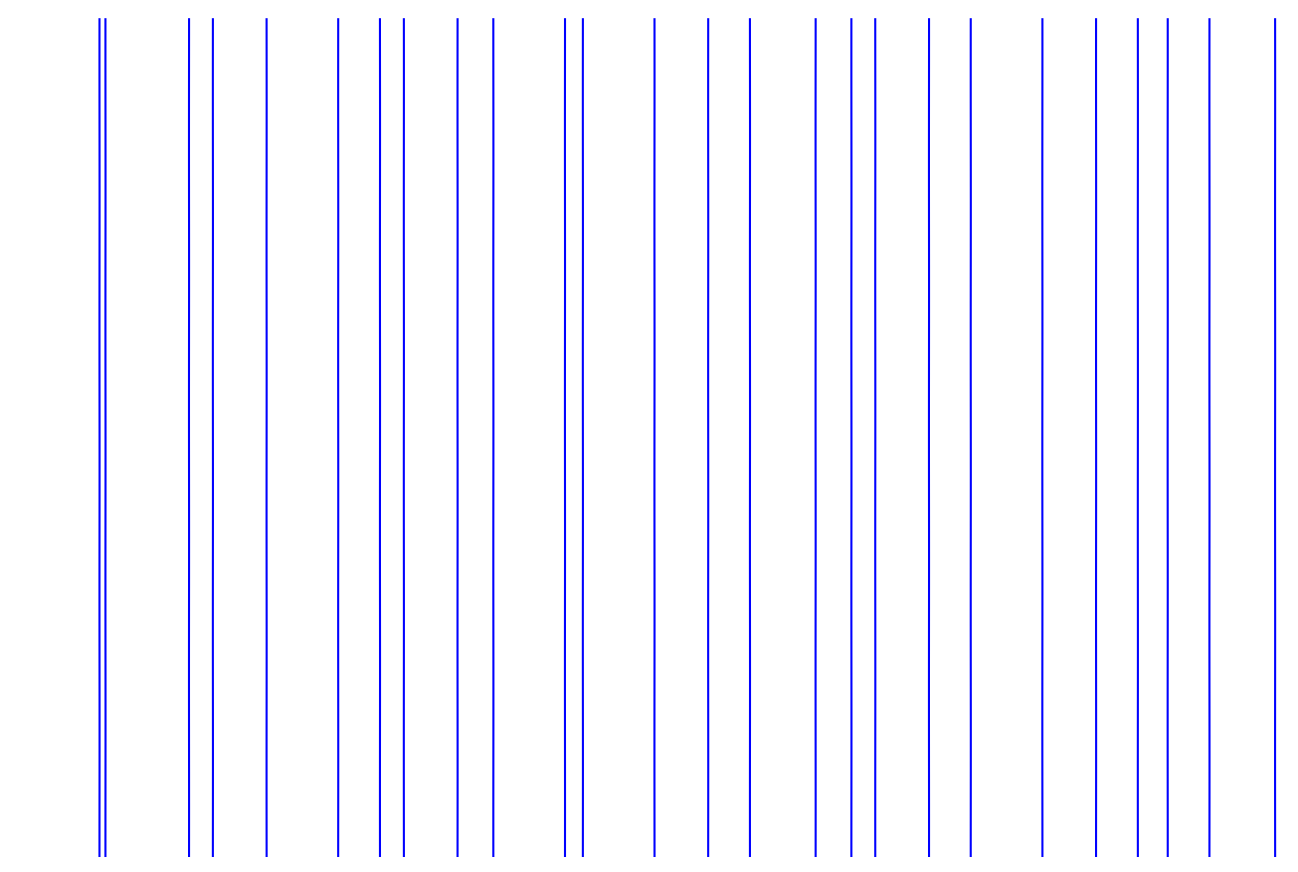

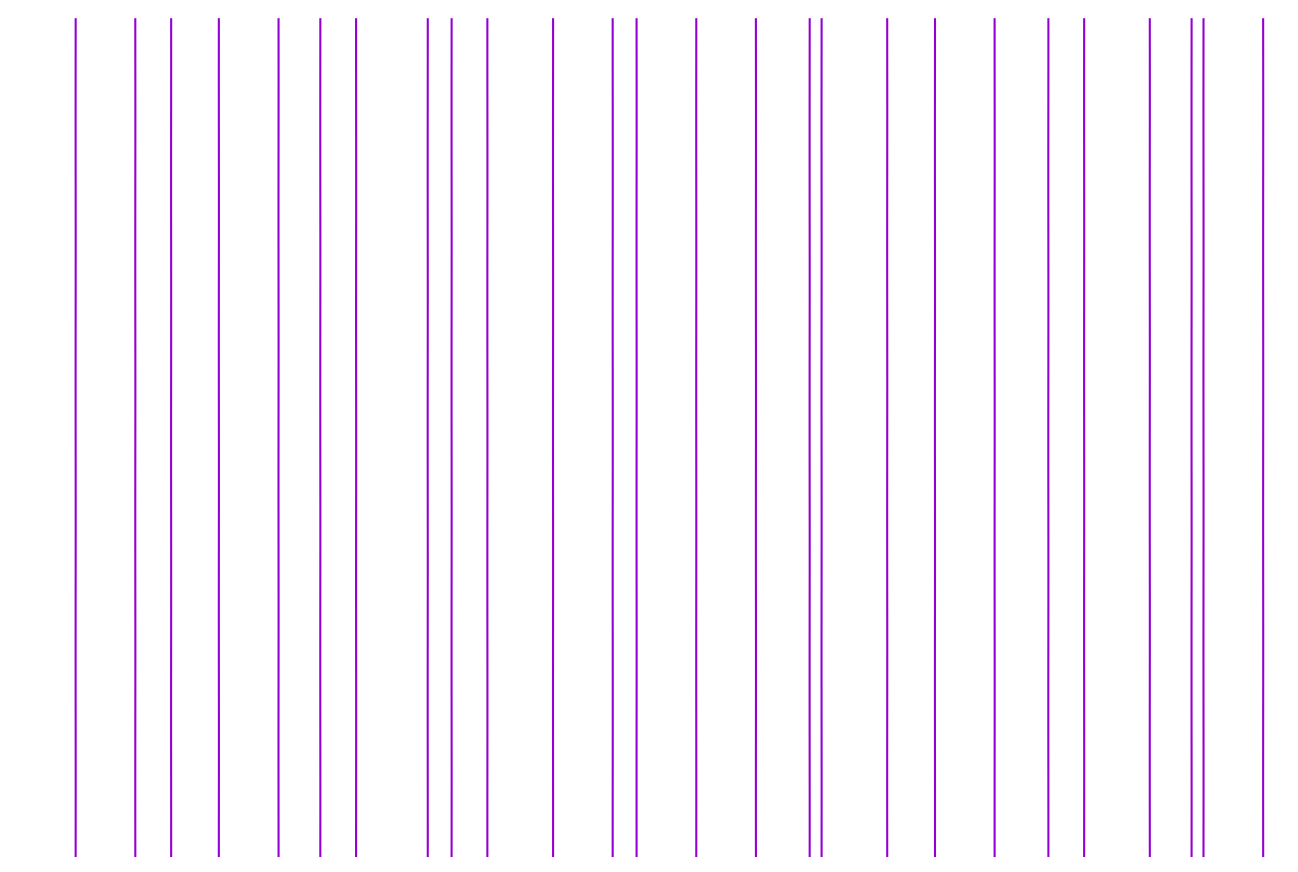

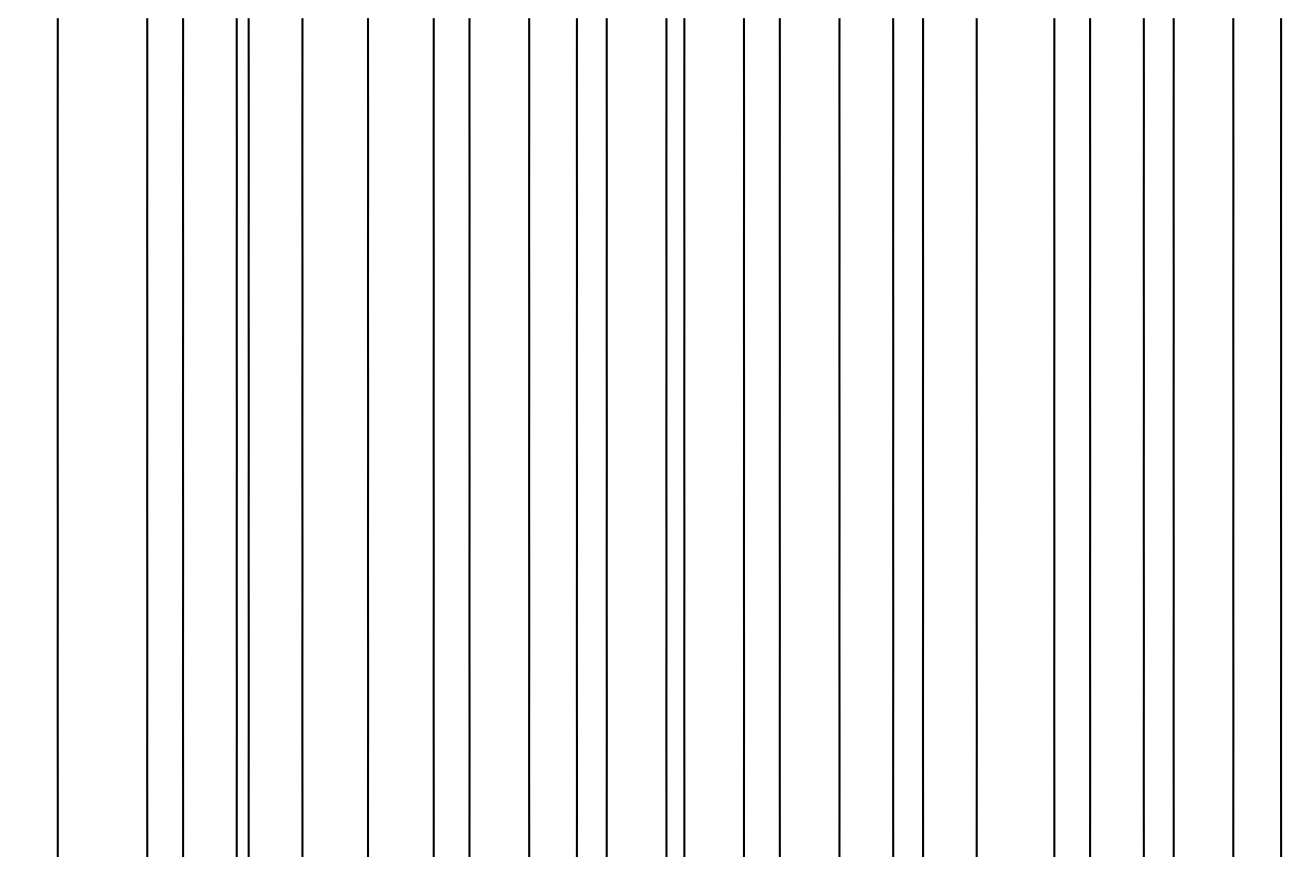

In [321]:
import random

def filtered_coords_to_segments(filtered, x_delta):
    segments, cur_segment = [], [filtered[0]]

    for idx, coord in enumerate(filtered):
        if idx == 0:
            continue
        if coord[0] - cur_segment[-1][0] <= x_delta:
            cur_segment.append(coord)
        else:
            segments.append(cur_segment)
            cur_segment = [coord]
    
    segments.append(cur_segment)

    return [np.array(seg) for seg in segments]

# color_data = {'cornflowerblue': 347, 'royalblue': 345, 'mediumblue': 351, 'indigo': 337, 'grey': 396, 'black': 1, 'red': 2}
# color_data = {'cornflowerblue': 347, 'royalblue': 345, 'mediumblue': 351, 'indigo': 337, 'grey': 396}
color_data = {'maroon': 347, 'darkorange': 345, 'yellow': 351, 'forestgreen': 337, 'deepskyblue': 396, 'blue': 1, 'darkviolet': 2, 'black': 0}
colors = list(color_data.keys())
color_combinations = list(permutations(colors))
random.shuffle(color_combinations)

permutations_switch = True

if not permutations_switch:
    color_combinations = [list(color_data.keys()) for el in color_combinations]

x_start = 1*np.pi
x_stop = 12**np.pi
points = 10000
x = np.linspace(x_start, x_stop, points)

x_delta = np.round(x[1]-x[0], 4) + .0001

num_colors = len(colors) # all colors and one rhythmic color - by pen blue/black

sine_squeeze_factor = .001
line_gap_y_factor = .14


shift_factor = np.random.rand()*2
shift_factor = 0.3
print(f'Shift factor: {shift_factor}')
shift_direction_every = np.random.randint(2,22)
shift_direction_every = 100
direction = 1
direction_on = 0

for color_idx, color in enumerate(color_data):
    for comb_idx, combination in enumerate(color_combinations):
        proper_color_idx = combination.index(color)
        shift = (proper_color_idx + len(combination)*comb_idx)

        shift_modulo = (comb_idx % shift_direction_every) +1
    
        if  shift_modulo == 1 and direction_on:
            direction = direction * (-1)

        if direction == -1:
            microshift = shift_direction_every - shift_modulo
        else:
            microshift = shift_modulo
        
        if not direction_on:
            microshift = -shift

        y = np.sin(x+microshift*shift_factor)*sine_squeeze_factor + shift*line_gap_y_factor

        coords = np.column_stack((x, y))
        x_mask = (coords[:, 0] >= 3) & (coords[:, 0] <= 23)
        y_mask = (coords[:, 1] >= 1) & (coords[:, 1] <= 30)
        # x_mask = (coords[:, 0] >= 0) & (coords[:, 0] <= 30)
        # y_mask = (coords[:, 1] >= 3) & (coords[:, 1] <= 23)
        filtered = coords[x_mask & y_mask]
        
        if len(filtered) > 0:
            segments = filtered_coords_to_segments(filtered, x_delta)
            for _ in range(1):
                for seg in segments:
                    # plt.plot(seg[:, 0], seg[:, 1], color=color, linewidth=1.5)
                    plt.plot(seg[:, 1], seg[:, 0], color=color, linewidth=1.5)

    plt.axis('off')
    plt.axis([0, 30, 3, 23])
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(8.25*2, 6*2)
    plt.savefig(f'{color_data[color]}-{color}.svg')
    plt.show()

# plt.axis('off')
# plt.axis([0,30,3,23])
# plt.gca().set_aspect('equal')
# plt.gcf().set_size_inches(8.25*2, 6*2)
# plt.savefig(f'{color_data[color]}-{color}.svg')
# plt.show()